In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
random.seed(42)
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN



## Data Overview

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Datasets/Customer_Data.csv")

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Data Preprocessing

In [9]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


In [10]:
df.dropna(inplace= True, axis=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

## Data Visulization

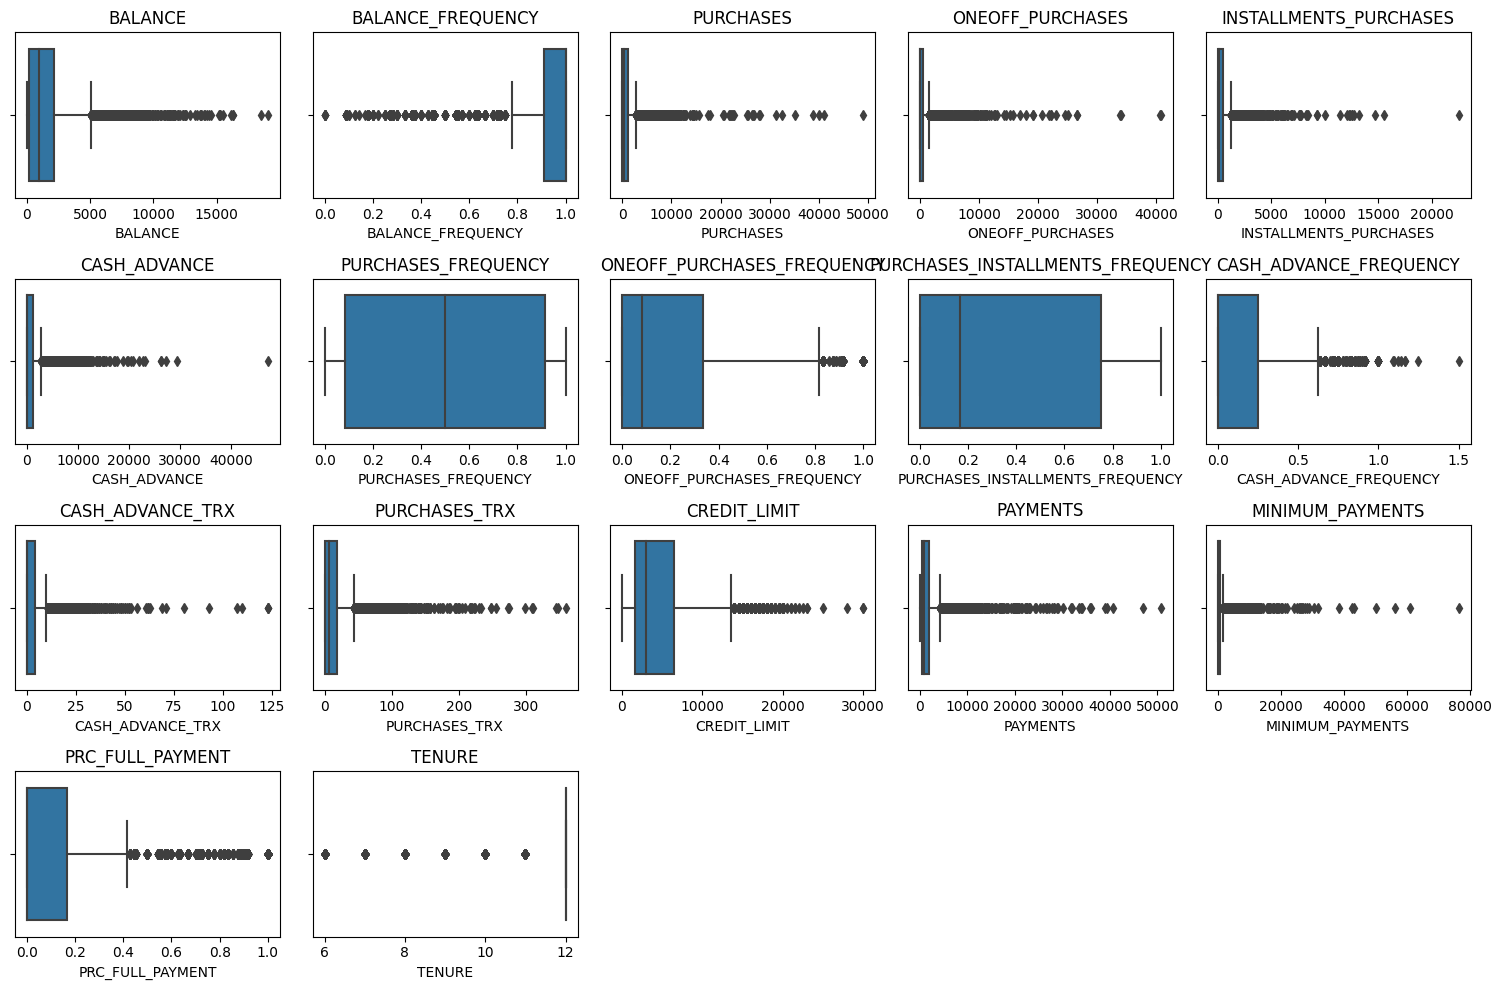

In [12]:
def data_distribution():
    columns_to_visualize = [
        'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
        'PRC_FULL_PAYMENT', 'TENURE'
    ]

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns_to_visualize, 1):
        plt.subplot(4, 5, i)
        sns.boxplot(data=df, x=column)
        plt.title(column)

    plt.tight_layout()
    plt.show()

data_distribution()

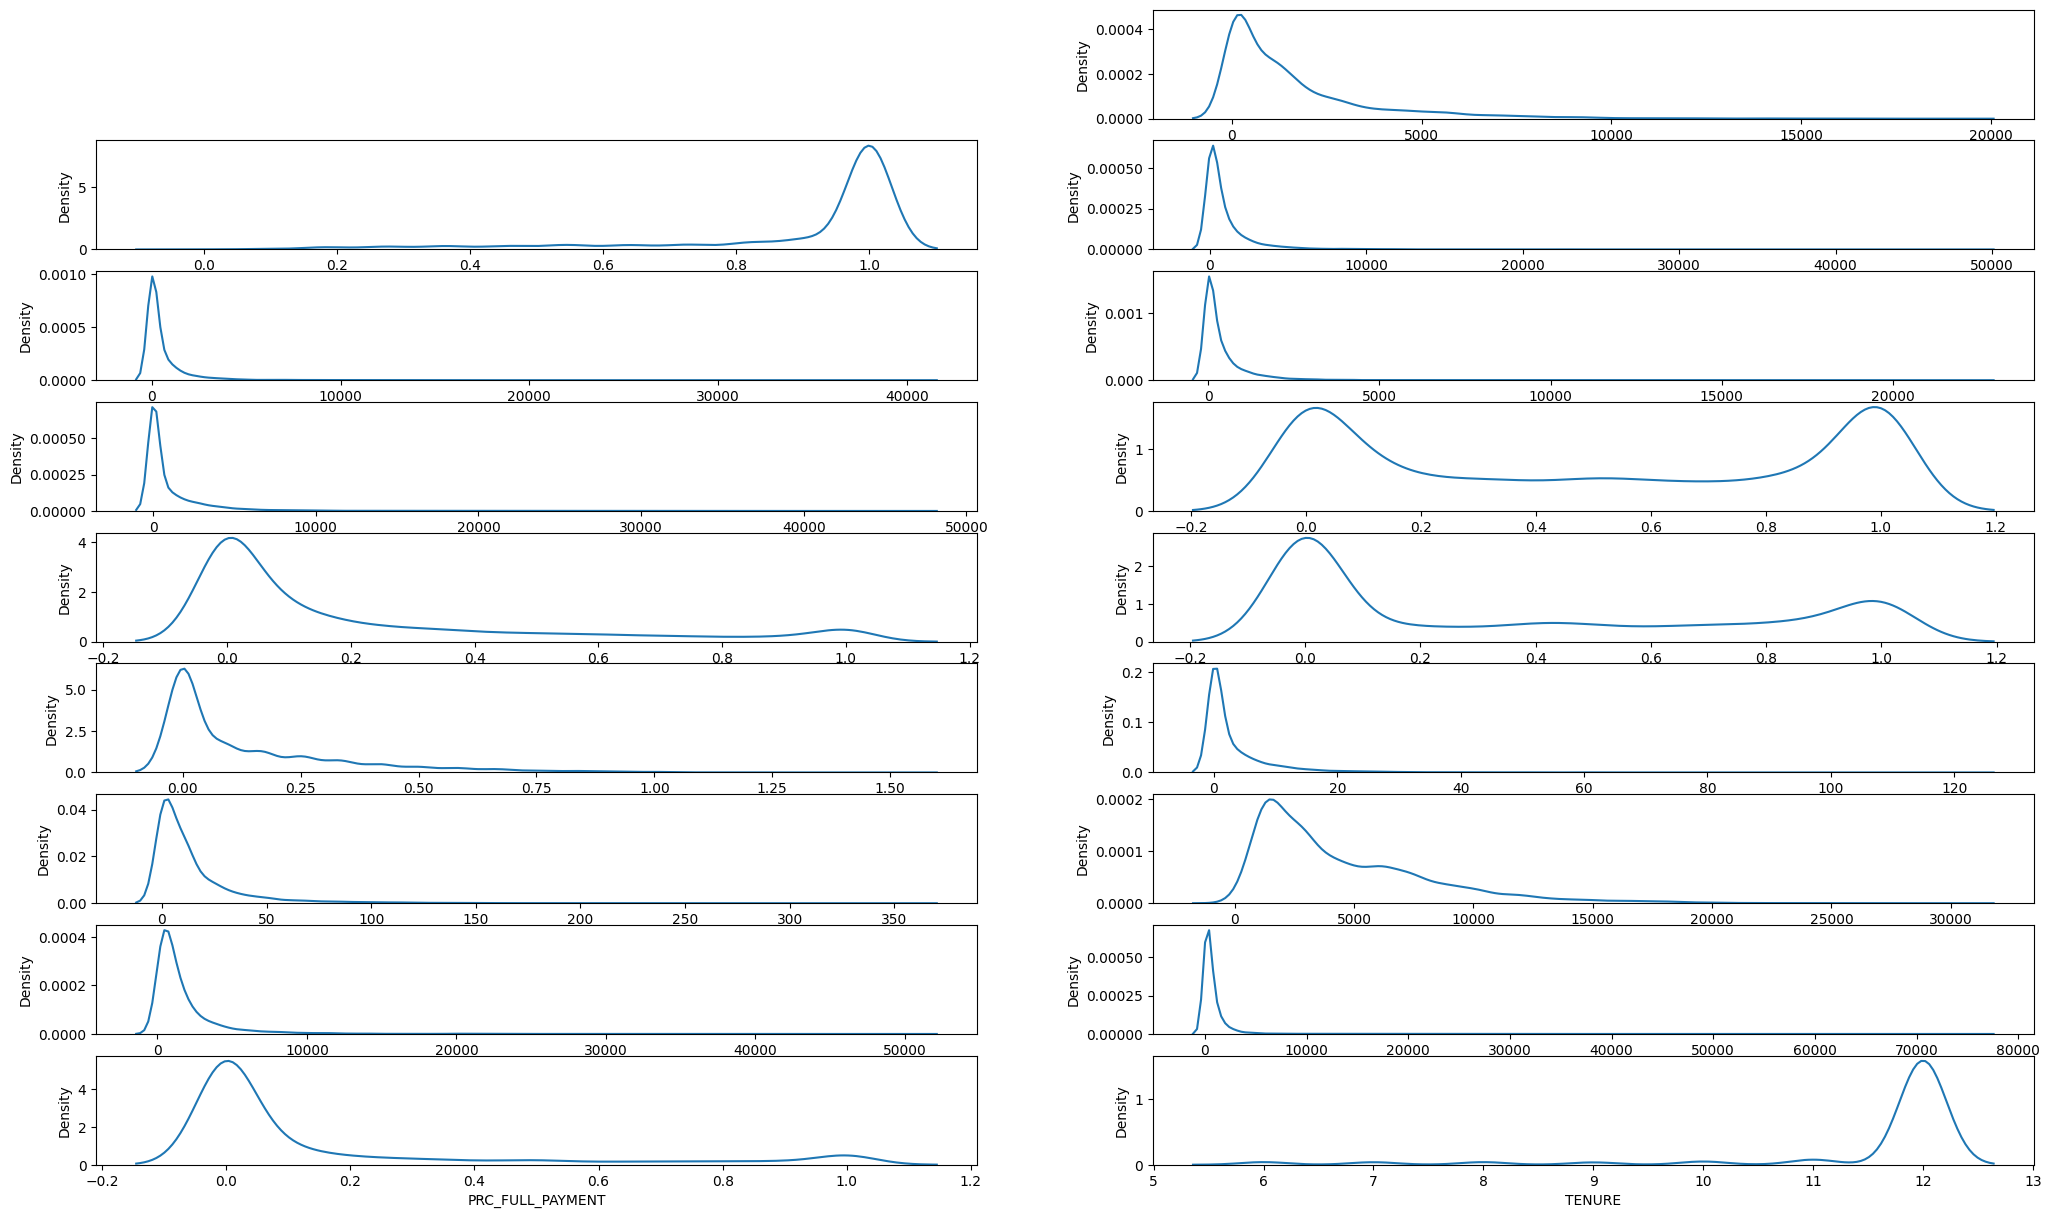

In [13]:
plt.figure(figsize=(25,15))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

     With the above two visualizations, we can see that the data is heavily skewed and also contains some outliers. The important thing to note here is that, since the data is not evenly distributed, it can affect some clustering algorithms like K-Means.

## EDA

    Univariate Analysis

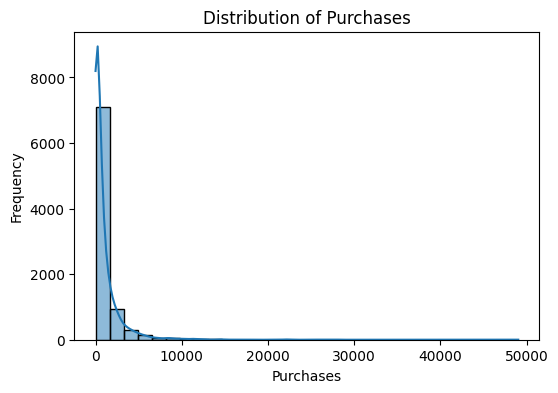

In [14]:
#What is the Purchases distribution?

plt.figure(figsize=(6, 4))
sns.histplot(df['PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

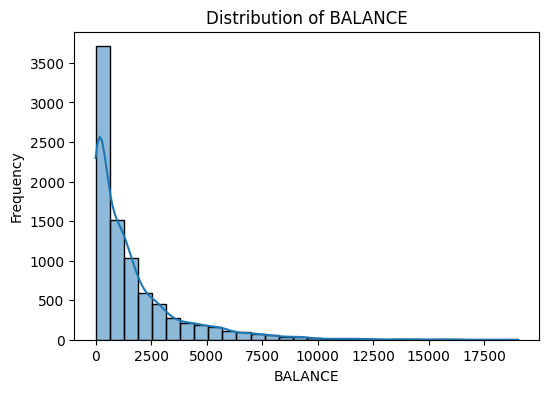

In [15]:
# What is the Balance distribution?

plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Distribution of BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.show()

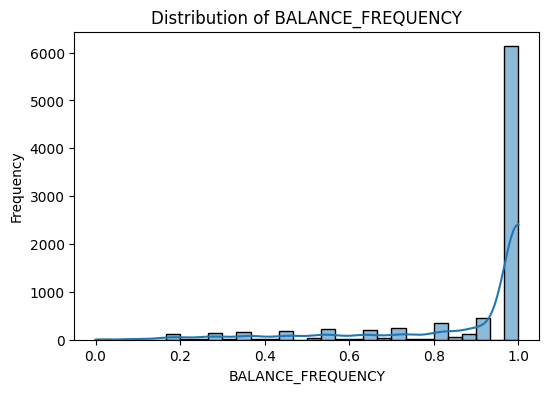

In [16]:
# What is the distribution of BALANCE_FREQUENCY?
plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True)
plt.title('Distribution of BALANCE_FREQUENCY')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('Frequency')
plt.show()

    Most of credit card accounts have 1 score in BALANCE_FREQUENCY column, which indicates that most customers use credit card frequently

In [17]:
# Top ten purchases in a single transaction.
top_ten_oneoff_purchases = df.sort_values(by='ONEOFF_PURCHASES', ascending=False).head(10)

print("Top Ten Purchases in 'ONEOFF_PURCHASES':")
print(top_ten_oneoff_purchases[['CUST_ID', 'ONEOFF_PURCHASES']])


Top Ten Purchases in 'ONEOFF_PURCHASES':
     CUST_ID  ONEOFF_PURCHASES
550   C10574          40761.25
501   C10523          40624.06
3937  C14048          34087.73
1604  C11657          33803.84
273   C10284          26547.43
7046  C17237          26514.32
1447  C11495          25122.77
1256  C11300          24543.52
587   C10611          23032.97
507   C10529          22257.39


In [18]:
# Bottom ten purchases

bottom_ten_minimum_payments = df.sort_values(by='MINIMUM_PAYMENTS').head(10)

print("Bottom Ten Purchases with 'MINIMUM_PAYMENTS':")
print(bottom_ten_minimum_payments[['CUST_ID', 'MINIMUM_PAYMENTS']])


Bottom Ten Purchases with 'MINIMUM_PAYMENTS':
     CUST_ID  MINIMUM_PAYMENTS
1978  C12041          0.019163
7927  C18142          0.037744
3787  C13895          0.055880
8014  C18231          0.059481
1419  C11467          0.117036
5875  C16040          0.261984
8713  C18950          0.311953
7678  C17884          0.319475
7971  C18187          1.113027
4332  C14453          1.334075


    Bivariate Analysis

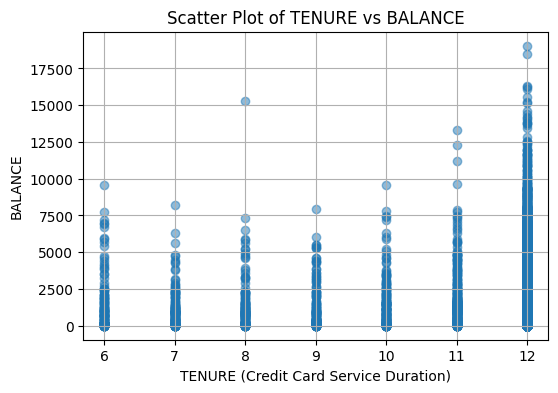

In [19]:
#Analyzing the relationship between 'TENURE' and 'BALANCE' to determine if the duration of the credit card service (tenure)
#  impacts the balance maintained by customers. 
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs BALANCE')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

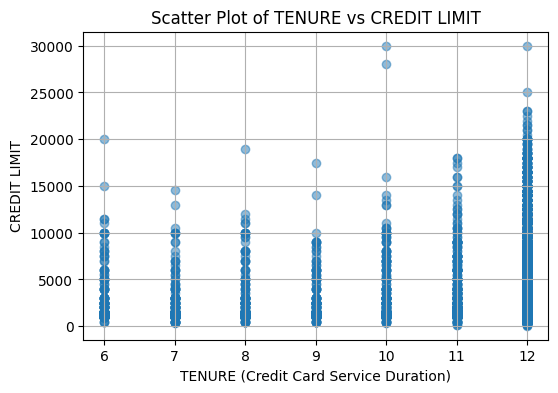

In [20]:
#Exploring how 'TENURE' is related to 'CREDIT LIMIT' to understand how the duration of the credit card service
# impacts the credit limits assigned to customers.
plt.figure(figsize=(6,4))
plt.scatter(df['TENURE'], df['CREDIT_LIMIT'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs CREDIT LIMIT')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('CREDIT LIMIT')
plt.grid(True)
plt.show()

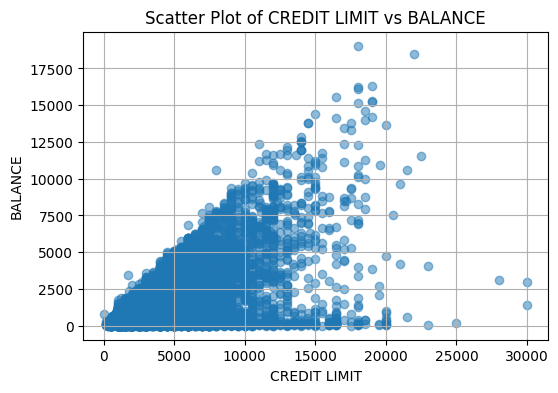

In [21]:
#relationship between 'CREDIT LIMIT' and 'BALANCE' to understand whether customers utilize their credit limits 
# effectively or if they tend to maintain lower balances.
plt.figure(figsize=(6, 4))
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of CREDIT LIMIT vs BALANCE')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

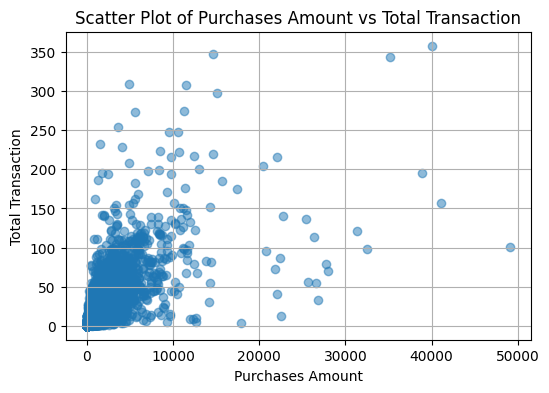

In [22]:
#Purchases Amount vs Total Transaction

plt.figure(figsize=(6, 4))
plt.scatter(df['PURCHASES'], df['PURCHASES_TRX'], alpha=0.5)
plt.title('Scatter Plot of Purchases Amount vs Total Transaction')
plt.xlabel('Purchases Amount')
plt.ylabel('Total Transaction')
plt.grid(True)
plt.show()

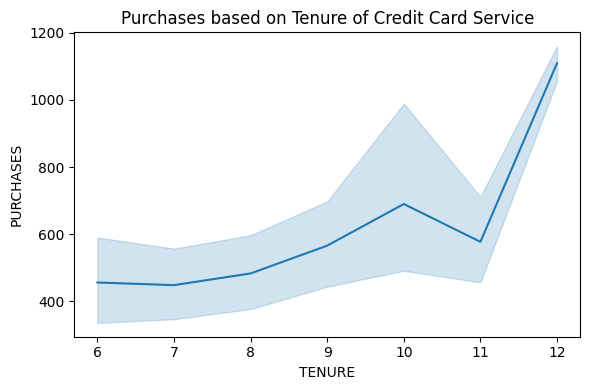

In [23]:
plt.figure(figsize=(6, 4))
# Line plot of Purchases based on Tenure
sns.lineplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Purchases based on Tenure of Credit Card Service')

plt.tight_layout()
plt.show()

    With an increase in the duration of card usage, the purchase price increases, especially over the course of a year, due to a significant difference between it and the others.

## Hopkins test

    The Hopkins statistic (Lawson and Jurs 1990) is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by uniform data distribution. In other words, it tests the spatial randomness of the data.

    https://sushildeore99.medium.com/really-what-is-hopkins-statistic-bad1265df4b#:~:text=The%20Hopkins%20statistic%20(Lawson%20and%20Jurs%201990)%20is%20used%20to%20assess%20the%20clustering%20tendency%20of%20a%20data%20set%20by%20measuring%20the%20probability%20that%20a%20given%20data%20set%20is%20generated%20by%20uniform%20data%20distribution.%20In%20other%20words%2C%20it%20tests%20the%20spatial%20randomness%20of%20the%20data.

In [24]:
# We will scale the data since, 
# It's preferable to scale the data before using hopkins or vat algorithm as they use distance between observations.
# https://pypi.org/project/pyclustertend/#:~:text=It%27s%20preferable%20to%20scale%20the%20data%20before%20using%20hopkins%20or%20vat%20algorithm%20as%20they%20use%20distance%20between%20observations.

numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])
df[numerical_features] = preprocessor.fit_transform(df[numerical_features])

In [25]:
df_scaled = df.copy()
df_scaled.drop(['CUST_ID'], inplace=True, axis=1)

In [26]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
  d = X.shape[1]
  #d = len(vars) # columns
  n = len(X) # rows
  m = int(0.1 * n)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
  rand_X = sample(range(0, n, 1), m)
 
  ujd = []
  wjd = []
  for j in range(0, m):
     u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
     ujd.append(u_dist[0][1])
     w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
     wjd.append(w_dist[0][1])
 
  H = sum(ujd) / (sum(ujd) + sum(wjd))
  if isnan(H):
     print(ujd, wjd)
     H = 0
 
  return H

In [27]:
H = hopkins(df_scaled)
print("Hopkins Statistic:", H)

Hopkins Statistic: 0.9643895472748004


    From the above value of 0.96, we can conclude that the data set is not uniformly distributed (i.e., it contains meaningful clusters).   

## Clustering

    PCA: We will perform Principal Component Analysis (PCA) to reduce the high-dimensional data to lower dimensions while preserving as much information as possible.

In [28]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

pca_columns = [f'PC{i + 1}' for i in range(len(df_scaled.columns))]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
output_df = pd.DataFrame({'Explained Variance Ratio': explained_variance, 'Cumulative Explained Variance Ratio': cumulative_variance})
print(output_df)

    Explained Variance Ratio  Cumulative Explained Variance Ratio
0               2.723118e-01                             0.272312
1               2.037431e-01                             0.476055
2               8.918334e-02                             0.565238
3               7.573609e-02                             0.640974
4               6.276618e-02                             0.703740
5               5.712786e-02                             0.760868
6               4.916188e-02                             0.810030
7               4.210734e-02                             0.852138
8               3.681697e-02                             0.888955
9               3.081508e-02                             0.919770
10              2.363804e-02                             0.943408
11              1.774540e-02                             0.961153
12              1.426710e-02                             0.975420
13              1.178660e-02                             0.987207
14        

    91% of the total variance can be seen by including the first 9 principal components.
    We will go with 9 Components since it gives least amount of dimensions with more explained variance

In [29]:
df_pca = df_pca.iloc[:,0:9]

    KMeans Clustering

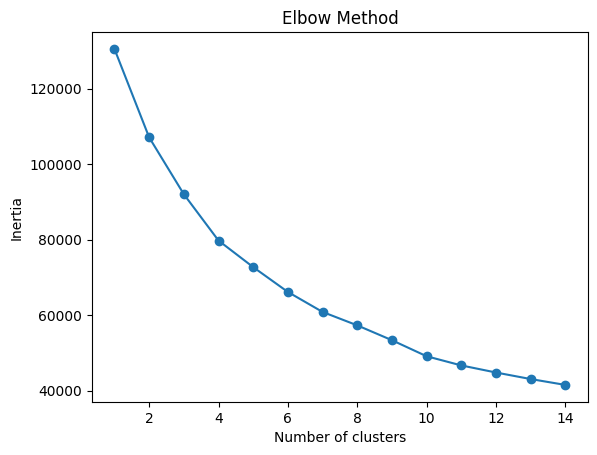

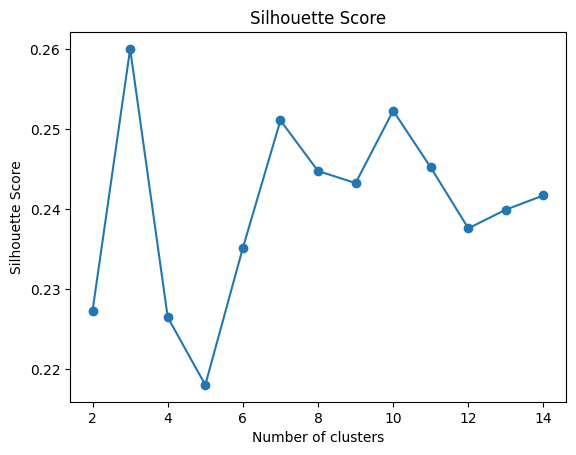

In [30]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_pca, labels)]

# Silhouette Score
plt.plot(range(1, 15), inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
 
plt.plot(range(2, 15), silhouette_avg,marker = 'o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

    Based on the information provided by the two graphs above, we can conclude that our data can be effectively clustered into 4 groups. At 4 clusters, the elbow curve's inertia reduces slowly, and the Silhouette Score is also favorable.

In [33]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(df_pca)
labels = kmeans_model.labels_
ch_kmeans= metrics.calinski_harabasz_score(df_pca, labels)
ss_kmeans = metrics.silhouette_score(df_pca, labels, metric='euclidean')
print(ch_kmeans)
print("-----")
print(ss_kmeans)

1680.853786643713
-----
0.23538593979180925


    DBSCAN

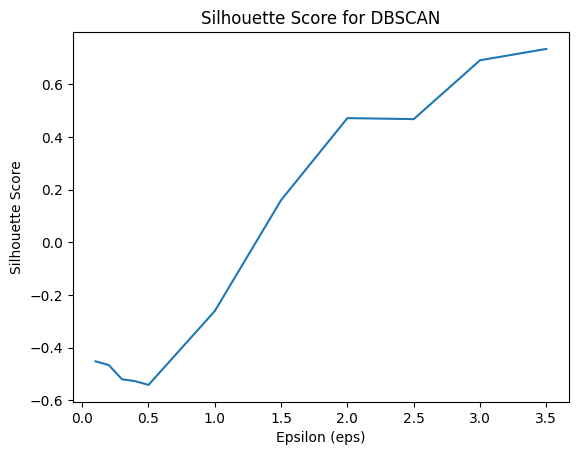

In [36]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 1 , 1.5, 2, 2.5, 3, 3.5]  
silhouette_avg = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(df_pca)
    
    if len(set(labels)) > 1:  
        silhouette_avg.append(silhouette_score(df_pca, labels))
    else:
        silhouette_avg.append(0)

plt.plot(eps_values, silhouette_avg, )
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.show()

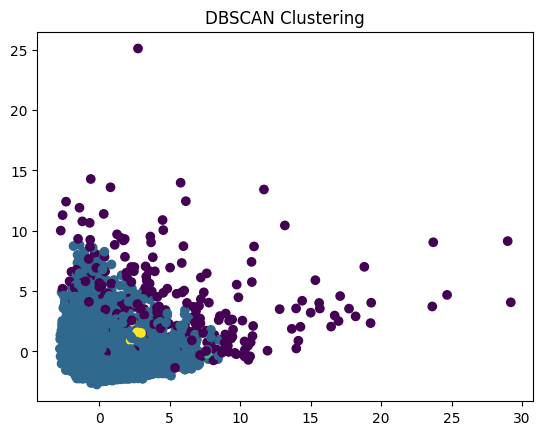

In [38]:
dbscan = DBSCAN(eps=2, min_samples=4)
dbscan_labels = dbscan.fit_predict(df_pca)
x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values
# Plotting
plt.scatter(x_values,y_values, c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

    Hierarchical Clustering (Agglomerative)

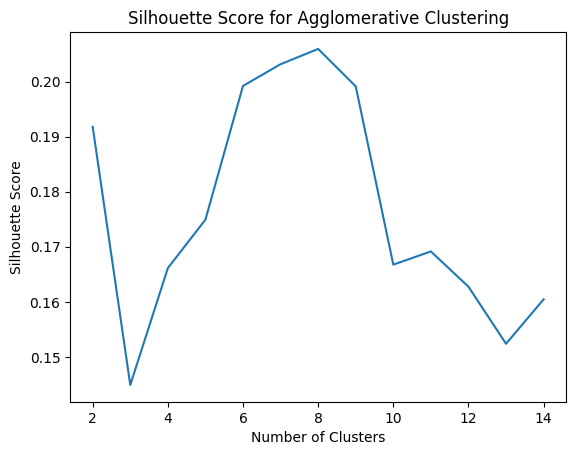

In [39]:
n_clusters_range = range(2, 10)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(n_clusters_range, silhouette_scores)
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [40]:
agglomerative = AgglomerativeClustering(n_clusters=4)
labels = agglomerative.fit_predict(df_pca)
ch_kmeans= metrics.calinski_harabasz_score(df_pca, labels)
ss_kmeans = metrics.silhouette_score(df_pca, labels, metric='euclidean')
print(ch_kmeans)
print("-----")
print(ss_kmeans)

1355.865895151331
-----
0.16612570452025568
